# RF



## Data Set 1

In [1]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd



In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
import pandas as pd

# Load data from the new Google Drive link
file_id = "1pI2WC2uOQARK3ayA6H4c1Eu2IRqURXbR"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the data
df = pd.read_csv(download_url)

# Backup original DataFrame
df_backup = df.copy()

# Create datetime directly from differently named columns
df['Date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MO'],
    'day': df['DY']
})

# Set Date as the index
df = df.set_index('Date')

# Drop unnecessary columns
df = df.drop(columns=["YEAR", "MO", "DY"])

# Display the DataFrame (optional in scripts)
print(df.head())

            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88     0.56352

In [3]:
df.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'WD_cos', 'AVG_TEMP',
       'WS10M_lag2', 'SURF_PRESSSURE', 'MAX_TEMP', 'RH_lag1', 'WD_sin_lag1',
       'WD_sin_lag2', 'SL_PRESSURE', 'PREC_lag1', 'WS10M'],
      dtype='object')

In [4]:

df.columns
df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,WD_cos,AVG_TEMP,WS10M_lag2,SURF_PRESSSURE,MAX_TEMP,RH_lag1,WD_sin_lag1,WD_sin_lag2,SL_PRESSURE,PREC_lag1,WS10M
Date,,,,,,,,,,,,,,,,
2013-01-03,4.25,86.26,23.42,13.42,0.439939,0.898028,26.4,3.99,99.68,28.38,86.19,0.500000,0.600420,1011.0,1.09,4.75
2013-01-04,4.75,86.31,22.93,8.79,0.424199,0.905569,25.1,4.25,99.65,27.58,86.26,0.439939,0.500000,1010.1,13.42,5.74
2013-01-05,5.74,86.88,22.17,2.60,0.563526,0.826098,26.9,4.75,99.50,26.16,86.31,0.424199,0.439939,1007.5,8.79,5.79
2013-01-06,5.79,88.09,23.47,1.65,0.460200,0.887815,27.3,5.74,99.47,27.75,86.88,0.563526,0.424199,1008.2,2.60,4.52
2013-01-07,4.52,93.04,24.04,27.41,0.368125,0.929776,25.9,5.79,99.46,26.70,88.09,0.460200,0.563526,1009.2,1.65,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,88.57,24.40,9.45,0.381070,0.924546,29.5,4.29,99.66,30.35,86.27,0.483282,0.697165,1011.0,3.50,6.43
2023-12-28,6.43,90.59,25.51,13.93,0.634731,0.772734,28.5,6.01,99.58,29.37,88.57,0.381070,0.483282,1010.9,9.45,3.93
2023-12-29,3.93,89.03,25.03,9.80,0.689620,0.724172,28.2,6.43,99.69,29.30,90.59,0.634731,0.381070,1011.4,13.93,2.59


## Data Sets

In [5]:
# Function to calculate evaluation metrics
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

In [6]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [7]:
# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]


In [8]:
numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88   


# LSTM

## Original

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 18.3139 - val_loss: 10.6511
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0441 - val_loss: 2.2982
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1094 - val_loss: 1.3677
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2543 - val_loss: 1.1347
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9988 - val_loss: 0.9827
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8460 - val_loss: 0.8807
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7415 - val_loss: 0.8070
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6644 - val_loss: 0.7505
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6062 - val_loss: 0.7057
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5620 - val_loss: 0.6697
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5285 - val_loss: 0.6404
Epoch 12/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0

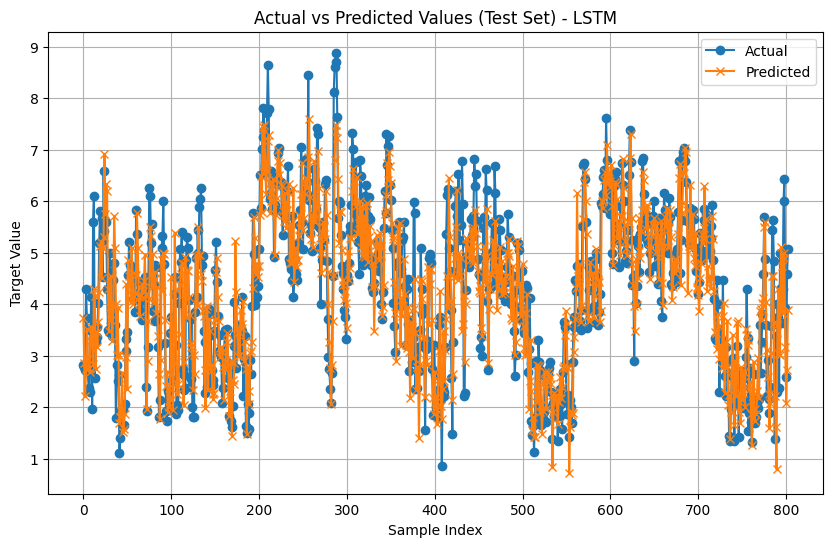

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set seed for reproducibility
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))  # output layer for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict
y_train_pred_lstm = model.predict(X_train_lstm).flatten()
y_test_pred_lstm = model.predict(X_test_lstm).flatten()

# Evaluation function
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

print("\n--- LSTM Evaluation ---")
evaluate(y_train_lstm, y_train_pred_lstm, label="Train (LSTM)")
evaluate(y_test_lstm, y_test_pred_lstm, label="Test (LSTM)")

# Comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test_lstm,
    'Predicted': y_test_pred_lstm
})

print(comparison_df.head(20))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='Actual', marker='o')
plt.plot(y_test_pred_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


## Grid Search

In [11]:
!pip install scikeras


In [12]:
import sklearn, scikeras, tensorflow
print("scikit-learn:", sklearn.__version__)
print("scikeras:", scikeras.__version__)
print("tensorflow:", tensorflow.__version__)


scikit-learn: 1.6.1
scikeras: 0.13.0
tensorflow: 2.18.0


In [13]:
!pip install --force-reinstall --no-cache-dir numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 210.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 175.9 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found e

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters Found:
{'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': 'rmsprop', 'model__units': 64}

--- LSTM Evaluation (Optimized) ---
Train MSE: 0.8131
Train RMSE: 0.9017
Train MAE: 0.7060
Train MAPE: 20.22%
Train R²: 0.6773
Test MSE: 1.0734
Test RMSE: 1.0360
Test MAE: 0.8170
Test MAPE: 22.25%
Test R²: 0.5549


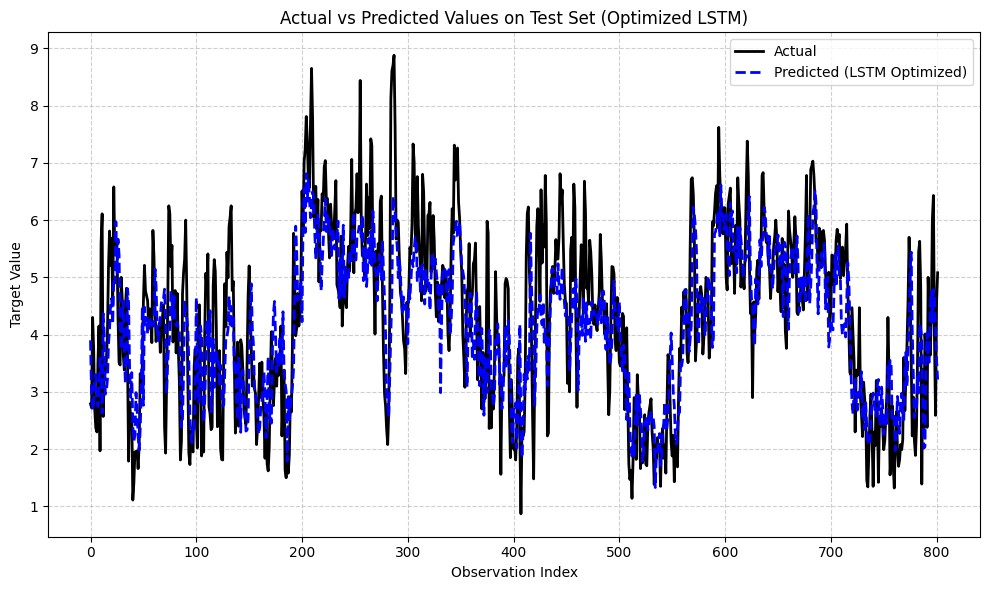

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor

# Set reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Set fixed window size
window_size = 1

def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(window_size, len(X)):
        Xs.append(X[i - window_size:i])
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)

# Prepare sequences
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, window_size)

# Model builder function
def build_lstm_model(units=64, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, activation='tanh', return_sequences=False, input_shape=(window_size, X_train_seq.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Wrap with KerasRegressor
regressor = KerasRegressor(model=build_lstm_model, verbose=0)

# Define parameter grid
param_grid = {
    "model__units": [32, 64, 128],
    "model__dropout_rate": [0.1, 0.2, 0.3],
    "model__optimizer": ['adam', 'rmsprop'],
    "batch_size": [16, 32],
    "epochs": [50, 100]
}

# Grid search
grid = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_result = grid.fit(X_train_seq, y_train_seq)

# Best model
best_model = grid_result.best_estimator_

print("\nBest Parameters Found:")
print(grid_result.best_params_)

# Predict
y_train_pred = best_model.predict(X_train_seq).flatten()
y_test_pred = best_model.predict(X_test_seq).flatten()

# Evaluation
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Evaluate
print("\n--- LSTM Evaluation (Optimized) ---")
evaluate_metrics(y_train_seq, y_train_pred, label="Train")
evaluate_metrics(y_test_seq, y_test_pred, label="Test")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Random Search

In [ ]:
!pip install --force-reinstall --no-cache-dir numpy scikit-learn


In [ ]:
!pip install scikeras


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  26.5s
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  27.3s
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  24.1s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  44.0s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  42.7s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  42.7s


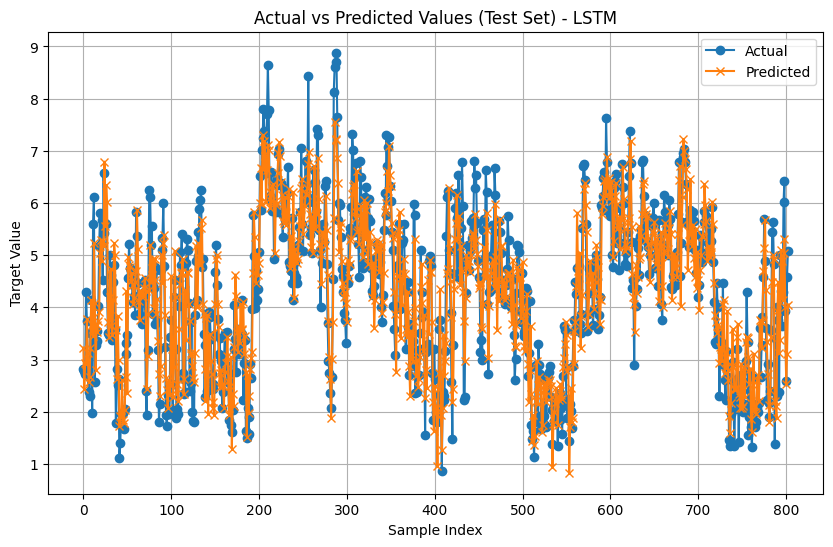

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor

from tensorflow.keras.optimizers import Adam

# Fix random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
import tensorflow as tf
tf.random.set_seed(RANDOM_SEED)
# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Prepare data for LSTM: reshape to 3D (samples, timesteps=1, features)
#X_train_lstm = X_train_sub.values.reshape((X_train_sub.shape[0], 1, X_train_sub.shape[1]))
#X_test_lstm = X_test_sub.values.reshape((X_test_sub.shape[0], 1, X_test_sub.shape[1]))

# Define function to create model (required for KerasRegressor)
def create_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap Keras model for sklearn
from scikeras.wrappers import KerasRegressor
from scipy.stats import randint, uniform

# Wrap the model using scikeras
lstm_regressor = KerasRegressor(model=create_lstm_model, verbose=0)

# Define parameter distribution with correct scikeras syntax
param_dist = {
    'model__units': randint(20, 151),
    'model__dropout_rate': uniform(0.1, 0.3),
    'model__learning_rate': uniform(1e-4, 9e-3),
    'batch_size': randint(16, 65),
    'epochs': randint(50, 151)
}

# Define parameter grid for Randomized Search (except window length)
from scipy.stats import randint, uniform


# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lstm_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    random_state=RANDOM_SEED,
    verbose=2,
    n_jobs=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_lstm, y_train)

# Best params
print("Best Hyperparameters:", random_search.best_params_)

# Predict on train and test sets using best estimator
y_train_pred_lstm = random_search.predict(X_train_lstm)
y_test_pred_lstm = random_search.predict(X_test_lstm)

# Evaluation function
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

print("\n--- LSTM Evaluation ---")
evaluate(y_train, y_train_pred_lstm, label="Train (LSTM)")
evaluate(y_test, y_test_pred_lstm, label="Test (LSTM)")

# Create a DataFrame to compare actual and predicted values on test set
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_lstm
})

print(comparison_df.head(20))

# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


## optuna

In [13]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Fix random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Reshape input for LSTM: (samples, timesteps=1, features)
#X_train_lstm = X_train_sub.values.reshape((X_train_sub.shape[0], 1, X_train_sub.shape[1]))
#X_test_lstm = X_test_sub.values.reshape((X_test_sub.shape[0], 1, X_test_sub.shape[1]))

# Evaluation function (same as you used)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Build LSTM model function for Optuna
def create_lstm_model(trial):
    units = trial.suggest_int('units', 20, 150)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Optuna objective for LSTM
def lstm_objective(trial):
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int('epochs', 50, 150)

    model = create_lstm_model(trial)

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_lstm):
        X_t, X_v = X_train_lstm[train_idx], X_train_lstm[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        history = model.fit(
            X_t, y_t,
            validation_data=(X_v, y_v),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,
            shuffle=False
        )
        preds = model.predict(X_v).flatten()
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Create and run Optuna study
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(lstm_objective, n_trials=30, timeout=600)

print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit final model on full train data with best params
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(units=best_params['units'], input_shape=(1, X_train_sub.shape[1])))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))
optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='mse', optimizer=optimizer)

final_model.fit(
    X_train_lstm, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    shuffle=False
)

# Predict
y_train_pred = final_model.predict(X_train_lstm).flatten()
y_test_pred = final_model.predict(X_test_lstm).flatten()

print("\n--- Optimized LSTM Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (LSTM Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (LSTM Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


[I 2025-07-23 07:36:17,422] A new study created in memory with name: no-name-e2723abb-6e1a-4d49-baea-9f22e859345e


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 07:39:43,640] Trial 0 finished with value: 1.3037000916803787 and parameters: {'batch_size': 32, 'epochs': 110, 'units': 40, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}. Best is trial 0 with value: 1.3037000916803787.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 07:43:16,649] Trial 1 finished with value: 0.6066648482322077 and parameters: {'batch_size': 16, 'epochs': 52, 'units': 147, 'dropout_rate': 0.4329770563201687, 'learning_rate': 0.00026587543983272726}. Best is trial 1 with value: 0.6066648482322077.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-07-23 07:45:22,108] Trial 2 finished with value: 0.503749709265729 and parameters: {'batch_size': 64, 'epochs': 103, 'units': 76, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}. Best is trial 2 with value: 0.503749709265729.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-23 07:47:31,570] Trial 3 finished with value: 0.5161520710424393 and parameters: {'batch_size': 64, 'epochs': 96, 'units': 122, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358}. Best is trial 2 with value: 0.503749709265729.



Best Trial:
FrozenTrial(number=2, state=1, values=[0.503749709265729], datetime_start=datetime.datetime(2025, 7, 23, 7, 43, 16, 650735), datetime_complete=datetime.datetime(2025, 7, 23, 7, 45, 22, 108044), params={'batch_size': 64, 'epochs': 103, 'units': 76, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'batch_size': CategoricalDistribution(choices=(16, 32, 64)), 'epochs': IntDistribution(high=150, log=False, low=50, step=1), 'units': IntDistribution(high=150, log=False, low=20, step=1), 'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.01, log=True, low=0.0001, step=None)}, trial_id=2, value=None)

Best Parameters:
{'batch_size': 64, 'epochs': 103, 'units': 76, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}


NameError: name 'X_train_sub' is not defined

Epoch 1/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 19.3676
Epoch 2/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.5499
Epoch 3/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5126
Epoch 4/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5226
Epoch 5/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1827
Epoch 6/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0460
Epoch 7/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9182
Epoch 8/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8520
Epoch 9/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7786
Epoch 10/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7188
Epoch 11/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6789
Epoch 12/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6753
Epoch 13/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6495
Epoch 14/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6238
Epoch 15/103
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6014
Ep

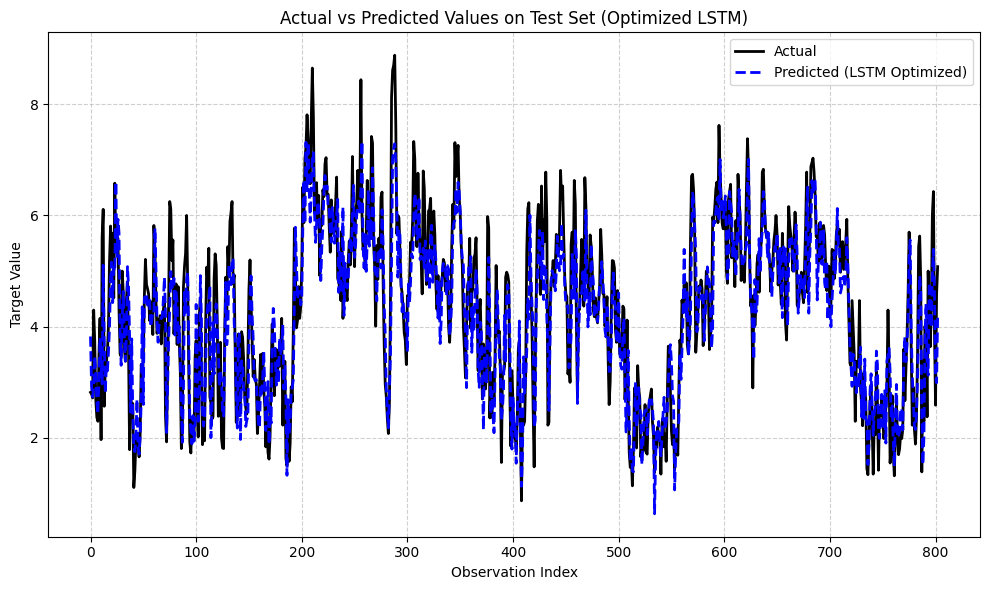

In [14]:

# Refit final model on full train data with best params
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(units=best_params['units'], input_shape=(1, X_train.shape[1])))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))
optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='mse', optimizer=optimizer)

final_model.fit(
    X_train_lstm, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    shuffle=False
)

# Predict
y_train_pred = final_model.predict(X_train_lstm).flatten()
y_test_pred = final_model.predict(X_test_lstm).flatten()

print("\n--- Optimized LSTM Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (LSTM Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (LSTM Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
